In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
%matplotlib inline

[[<matplotlib.collections.PathCollection at 0x7fed7b54e590>,

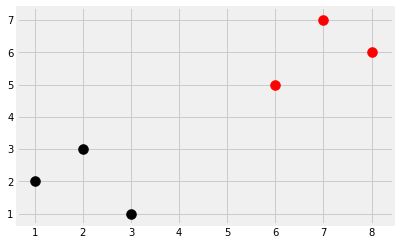

In [6]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]

In [3]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]  # sort the distances, and find out the k smallest distances
    vote_result = Counter(votes).most_common(1)[0][0]  # find out the class of the most happened class within k smallest distancess
    return vote_result 

## Test on the one point

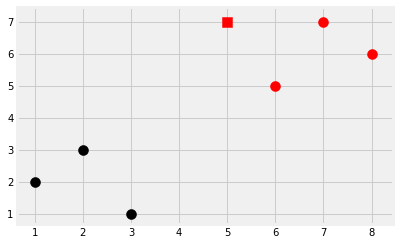

In [8]:
new_features = [5,7]

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
        
result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, marker = 's',color = result)
plt.savefig("knn.png")

## Test on real-world DataSet in UCI Repository 'Breast Cancer Wisconsin'

In [15]:
import pandas as pd
import random

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)  # deal with the missed values
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}  # 2: benign; 4: malignant  
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9784172661870504
